# Thresholding lab

## Goal

In this lab we need to explore and threshold using colorspaces we learned in the first section of this module.

Use whatever colorspace or channel you need to achieve a result as clear as you can throughout the whole video.

You will find the video in 'Files/Threshold/Lanes.mp4'

## Criteria

- Output must be a video of binary frames.
- Lanes must be as clear as you can.

## Example

### Input

![Image](Files/Threshold/labInput.png)


### Output

![Image](Files/Threshold/labout.png)

## Grade

10

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

This image is: <class 'numpy.ndarray'> with dimensions: (600, 1024, 3)


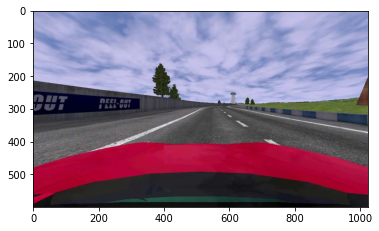

In [2]:
#reading in an image
image = cv2.imread('labInput.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
color_select = np.copy(image)
plt.imshow(color_select)

In [3]:
def nothing(x):
    pass

cv2.namedWindow('Image',cv2.WINDOW_NORMAL)

cv2.createTrackbar('r_thresh', 'Image', 0, 255, nothing)
cv2.createTrackbar('g_thresh', 'Image', 0, 255, nothing)
cv2.createTrackbar('b_thresh', 'Image', 0, 255, nothing)

while (1):
    r_thresh = cv2.getTrackbarPos('r_thresh','Image')
    g_thresh = cv2.getTrackbarPos('g_thresh','Image')
    b_thresh = cv2.getTrackbarPos('b_thresh','Image')
    
    rgb_threshold = [r_thresh,g_thresh,b_thresh]
    color_select = np.copy(image)
    # Identify pixels below the threshold and set them to 0
    thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
    color_select[thresholds] = [0,0,0]
    
    
    cv2.imshow('Image', color_select)
    k = cv2.waitKey(1)
    
    if k == ord('q'):
        break
    
cv2.destroyAllWindows()

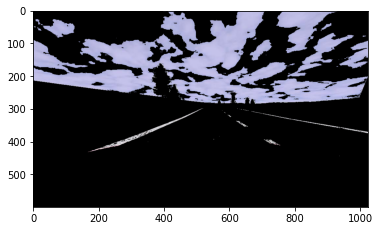

In [4]:
color_select = np.copy(image)
# Define our color threshold

rgb_threshold = [170,150,140]
color_select = np.copy(image)
    # Identify pixels below the threshold and set them to 0
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]
    
plt.imshow(color_select)

In [5]:
def color_thresh(img):
    
    color_select = np.copy(img)
    
    red_threshold = 190
    green_threshold = 160
    blue_threshold = 150
    rgb_threshold = [red_threshold, green_threshold, blue_threshold]
    
    color_thresholds = (img[:,:,0] < rgb_threshold[0]) | \
                    (img[:,:,1] < rgb_threshold[1]) | \
                    (img[:,:,2] < rgb_threshold[2])
    
    color_select[color_thresholds] = [0,0,0]
    
    return color_select


In [7]:
import cv2
import numpy as np
  
# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('Lanes.mp4')
  
#cv2.imwrite(f"Images2/imag{i}.jpg",image)
#Loop untill the end of the video
i = 1 
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    frame = cv2.resize(frame, (540, 380), fx = 0, fy = 0,
                         interpolation = cv2.INTER_CUBIC)
  
    # Display the resulting frame
    image = color_thresh(frame)
    cv2.imwrite(f"Images/image{i}.jpg",image)
    i += 1
  
    # using cv2.Gaussianblur() method to blur the video
  
    # (5, 5) is the kernel size for blurring.
    gaussianblur = cv2.GaussianBlur(frame, (5, 5), 0) 
    cv2.imshow('gblur', gaussianblur)
  
    # define q as the exit button
    if k == 27:
        break
        
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
  

cap.release()
  
# Closes all the windows currently opened.
cv2.destroyAllWindows()

In [8]:
import glob
 
img_array = []
for filename in glob.glob('Images/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project2.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()